## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

All the imports

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os
pd.options.display.max_rows = 100
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the data from csv file and creating the dataframe

In [180]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [181]:
data.shape

(1460, 81)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Analysis : Few columns have large percentage of null values. At some point of time we may have to remove these columns 

In [183]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Performing EDA on the data

In [184]:
# % of null values in all the colums
pd_new = round(100*(data.isnull().sum()/len(data.index)), 2)
pd_new

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

MiscFeature
PoolQC
Fence
Alley
       
have high % of null values and hence removing them from the data set

In [185]:
# Grouping columns with high % of null values
data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [186]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    data[i].fillna("none", inplace=True)

In [187]:
# dropping the columns with high % of null values

data.drop(['Fence','Alley','PoolQC','MiscFeature'],axis=1,inplace = True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [188]:
#Selecting numeric columns
data.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [189]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["Electrical"].dropna(inplace=True)

In [190]:
# Due to large scale variation in SalePrice we will change it to exp notation
data['SalePrice']=np.log1p(data['SalePrice'])

<AxesSubplot:>

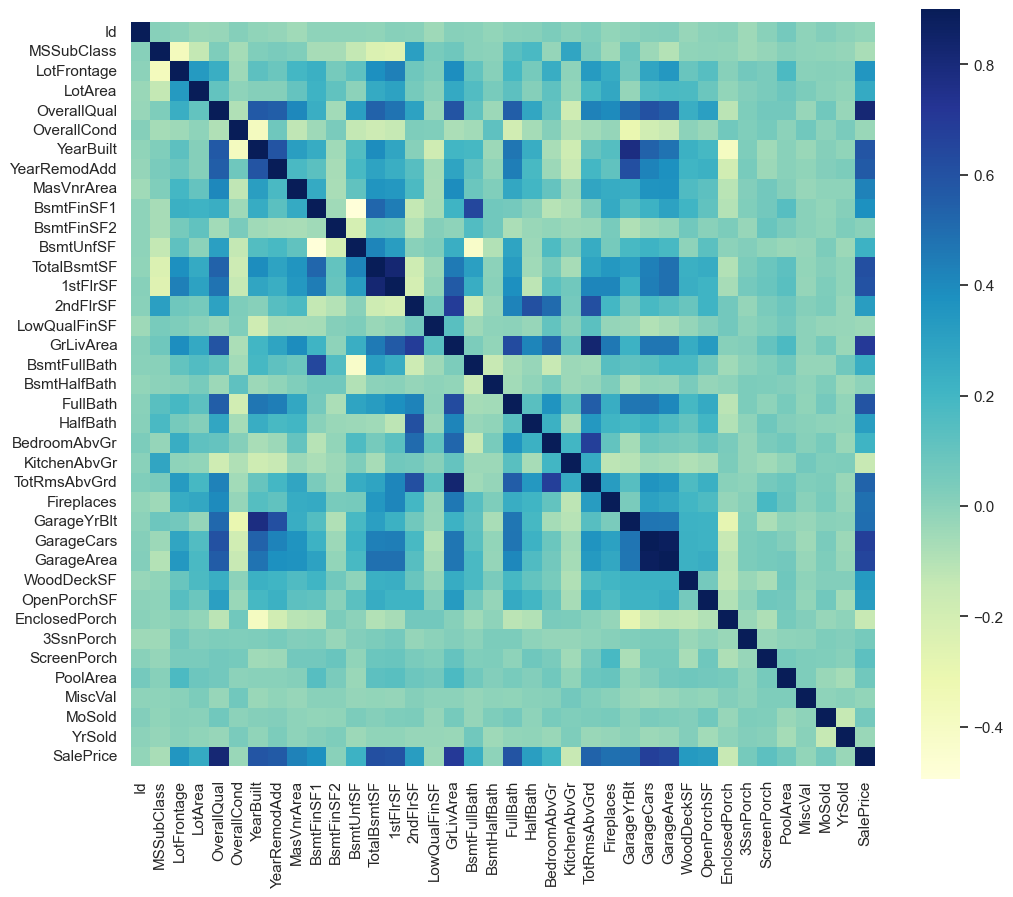

In [191]:
#Correlation matrix to identify how the variables are correlated
corr_matrix = data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmax=0.9, cmap="YlGnBu"  , square=True)

Below variables are highly correlated as can be seen from plot
- LotFrontage
- Overall Quality
- Year Built
- Year removeadd
- MasVnrArea
- TotalBsmn SF
- 1st Foor SF
- Gr ving Area
- Fullbath
- Fireplaces
- Garage Area

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

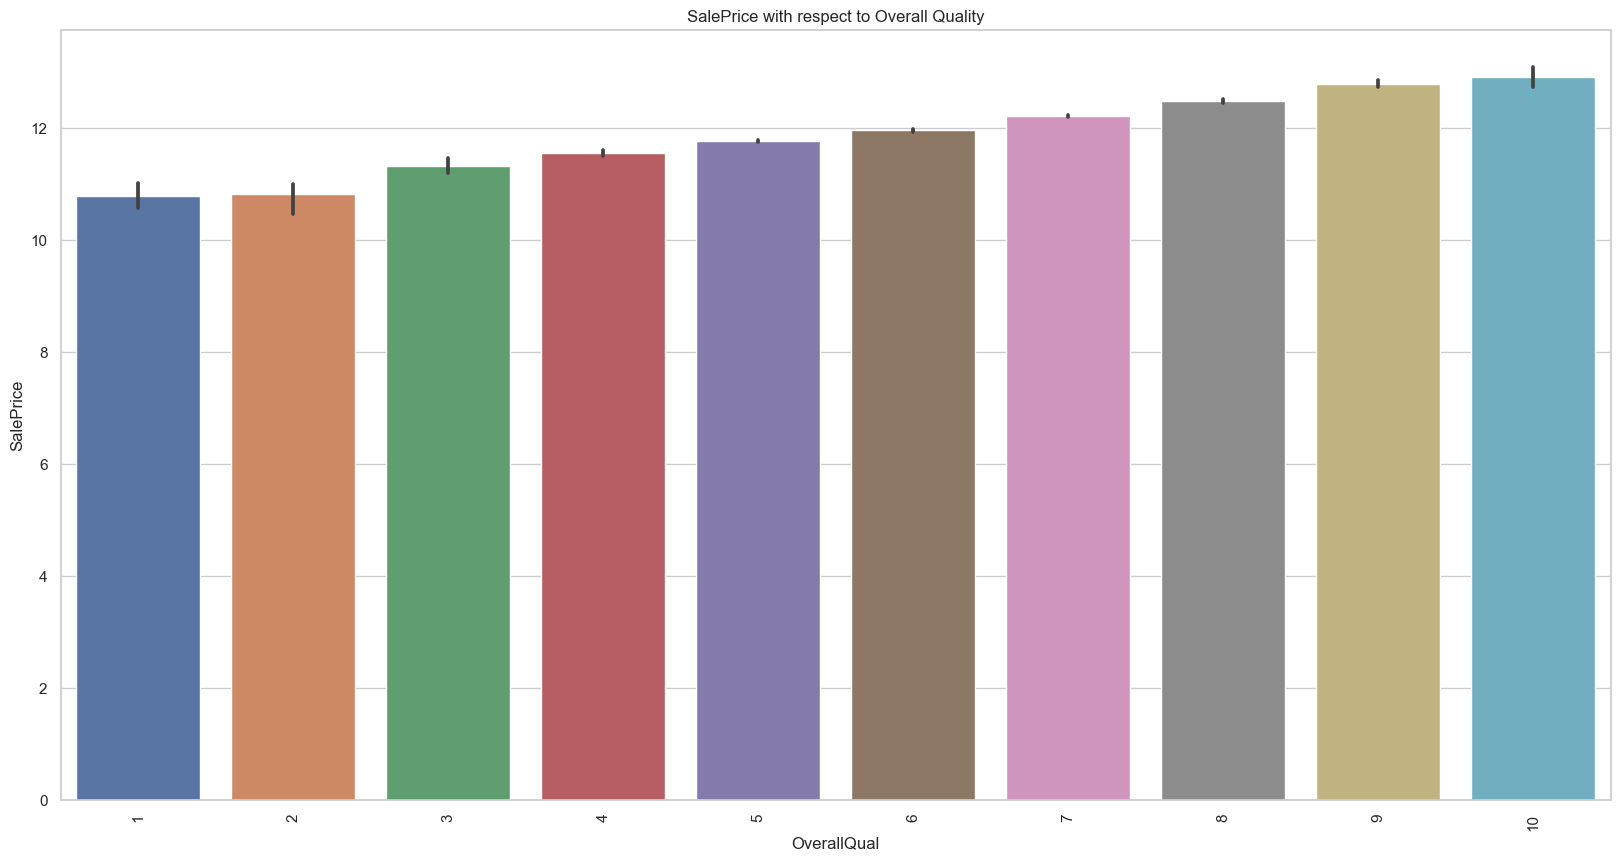

In [192]:
# Lets analyze overall quality against sale price

# plotting overall quality with respect to 'Saleprice'

plt.figure(figsize=(20, 10))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("SalePrice with respect to Overall Quality")
plt.xticks(rotation=90)

Analysis : Seems like as overall quality increases the SalePrice increases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

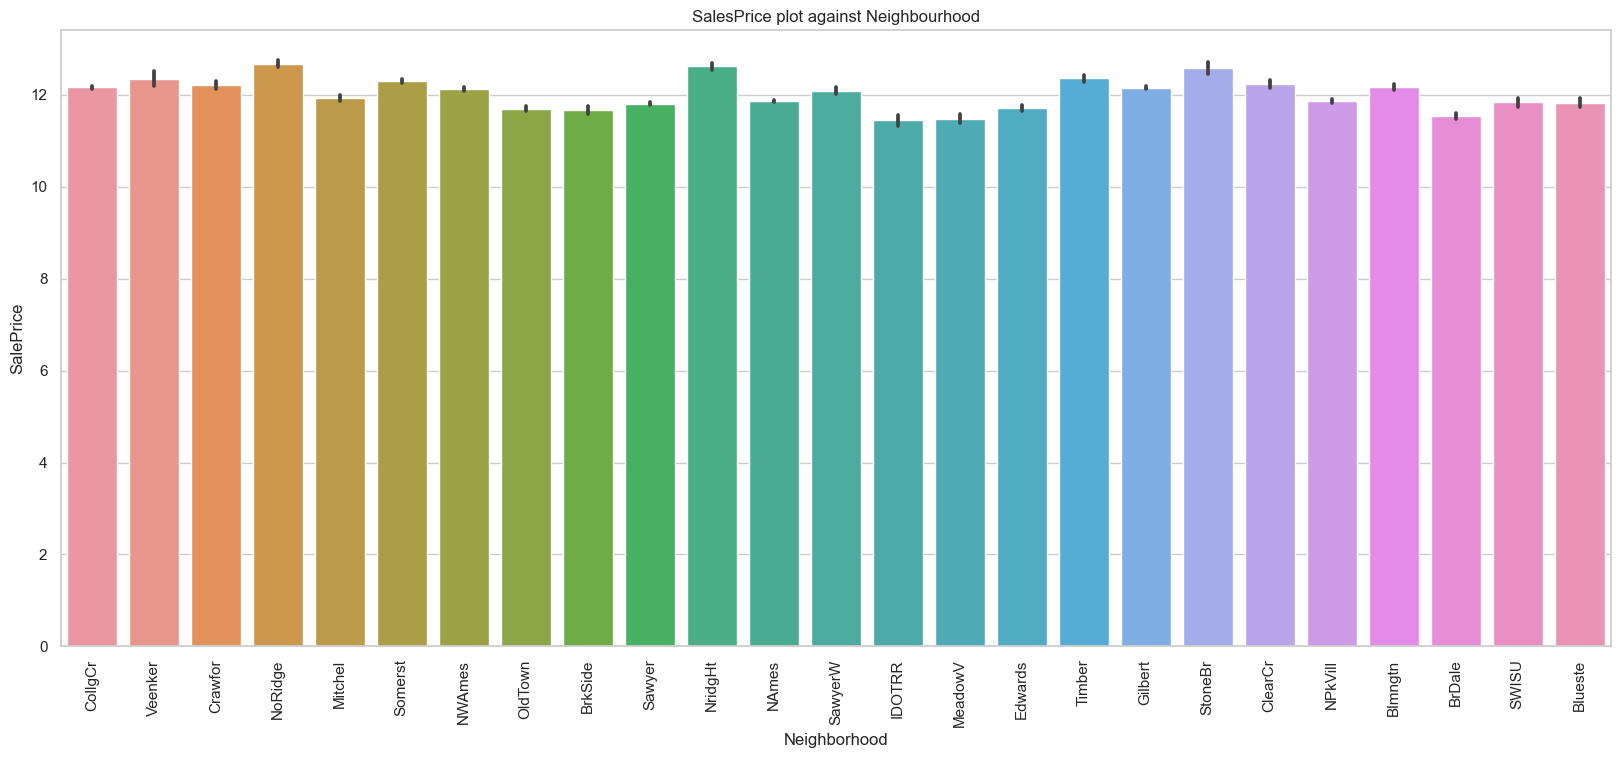

In [193]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("SalesPrice plot against Neighbourhood")
plt.xticks(rotation=90)

Analysis : Sales price in certain neighbourhoods like NoRidge, StoneBr NiridgHT etc is significantly high

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

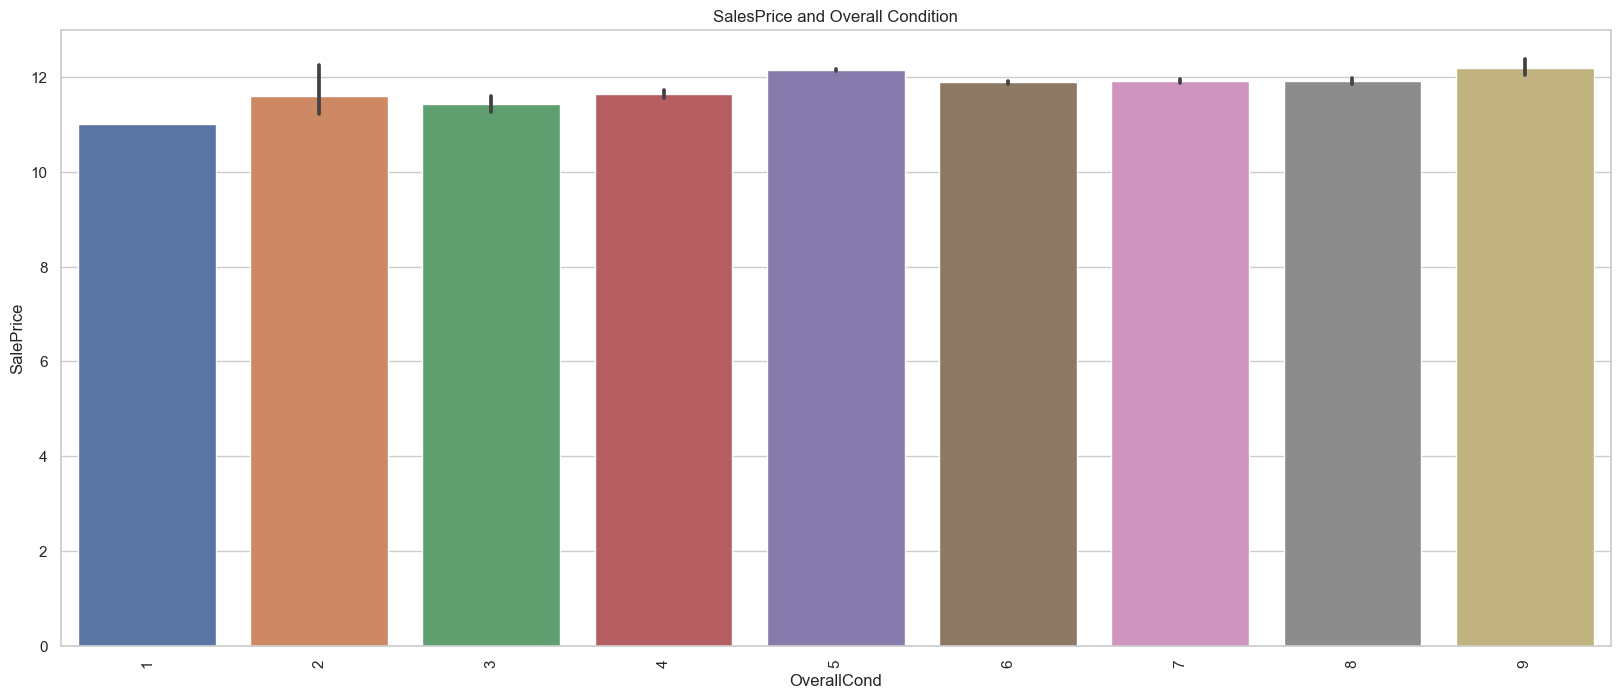

In [194]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= data)
plt.title("SalesPrice and Overall Condition")
plt.xticks(rotation=90)

Analysis: As the overall condition increases the SalePrice also increases

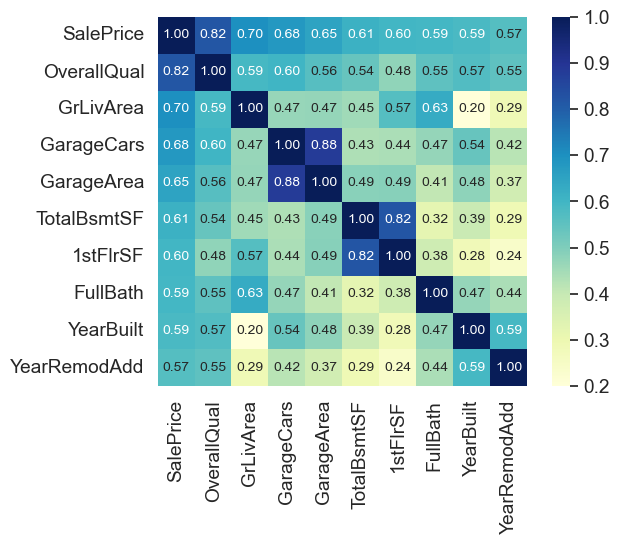

In [195]:
# plotting correlation matrix for top 10 variables

k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap="YlGnBu" ,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see from the above chart that the top 10 variables are similar to what we had initially deciphered
- OverallQual - It is obvious that having a good quality house would fetch bigger price
- Grlivarea - More the area of the floor above the ground floor, greater is the price
- Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense 

### Pair plots of various variables

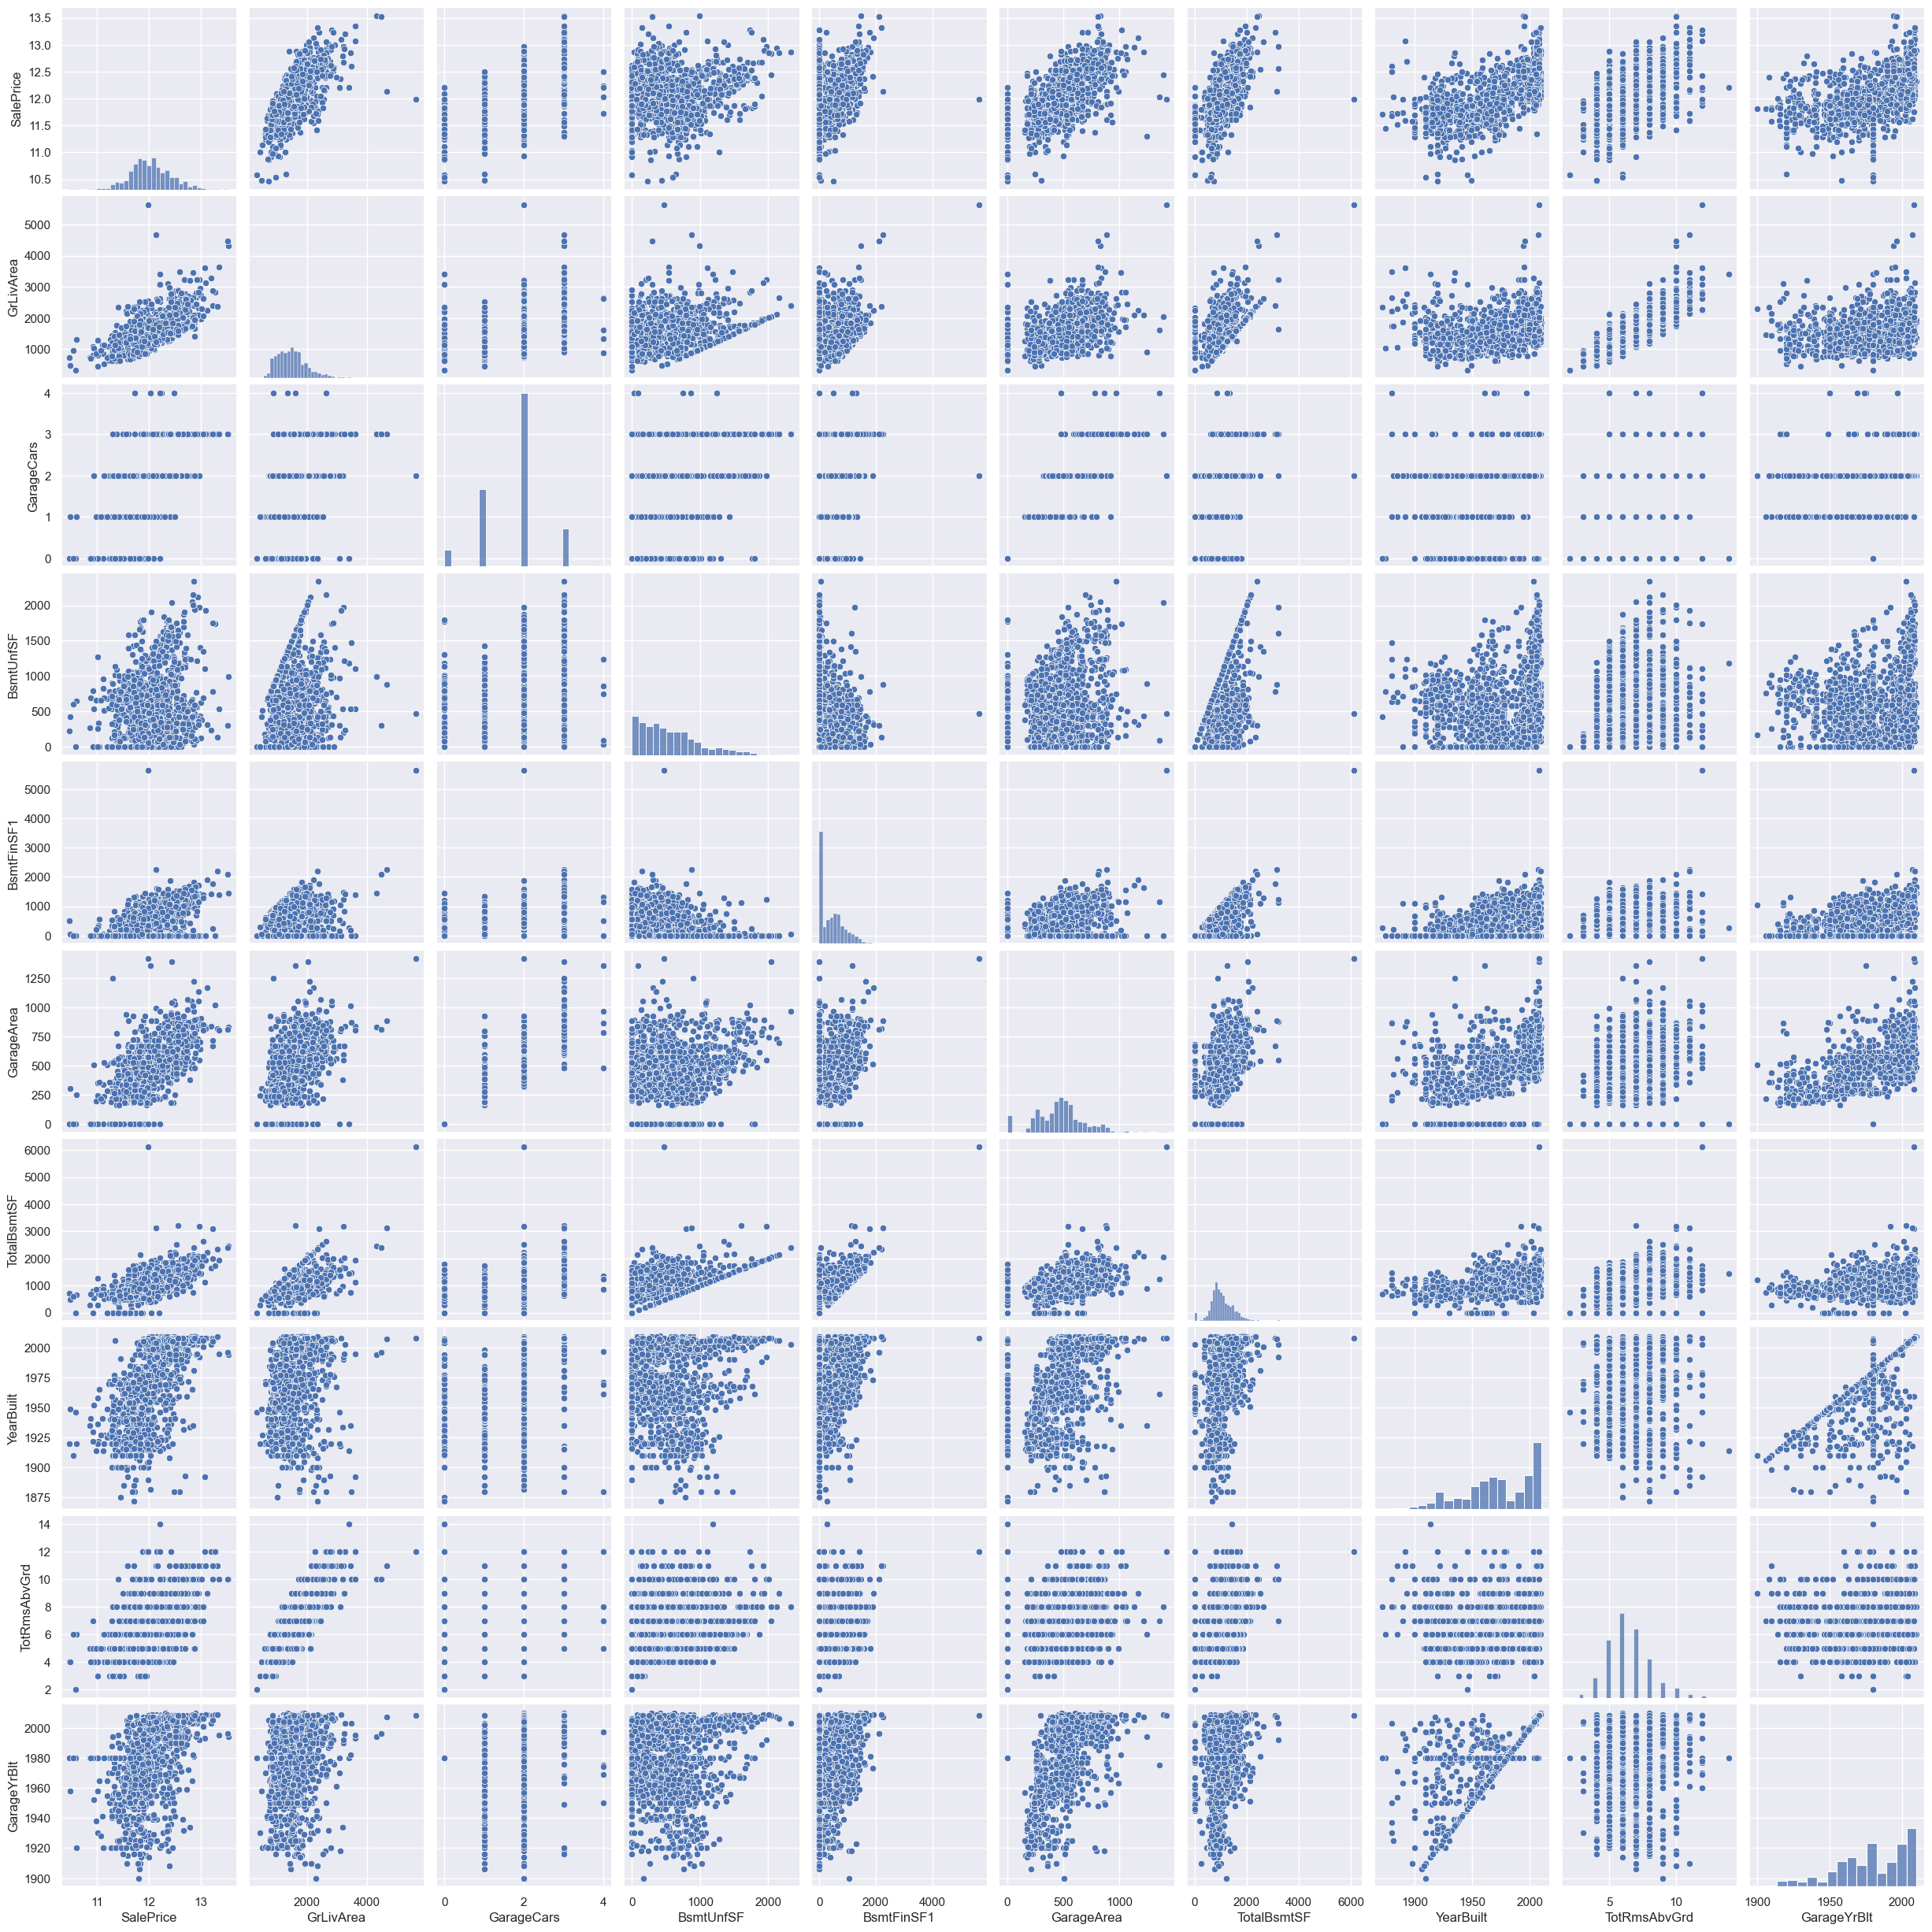

In [196]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

Based on above analysis we may drop the correlated columns which are not contributing to SalePrice

In [197]:
# removing the correlated columns from the dataframe

data = data.drop(['GarageCars'], axis = 1)
data = data.drop(['BsmtUnfSF'], axis = 1)
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


Drop the id column as it is of no use

In [198]:
#drop id as it is not required for training or prediction
data.drop(['Id'], axis=1, inplace=True)
data.shape

(1460, 72)

### Checking for outliers

We will plot scatter plot

In [199]:
sns.set_style('whitegrid')
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))

#function to plot scatter plot between a feature and the Sale Price 
def scatter_plot(a):
    fig, ax = plt.subplots()
    ax.scatter(x = data[a], y = data['SalePrice'], edgecolor=edgecolor)
    plt.ylabel('SalePrice', fontsize=12)
    plt.xlabel(a, fontsize=12)
    plt.suptitle("Scatter Plot of "+ a + " and SalePrice")
    plt.show()

<Figure size 1200x1200 with 0 Axes>

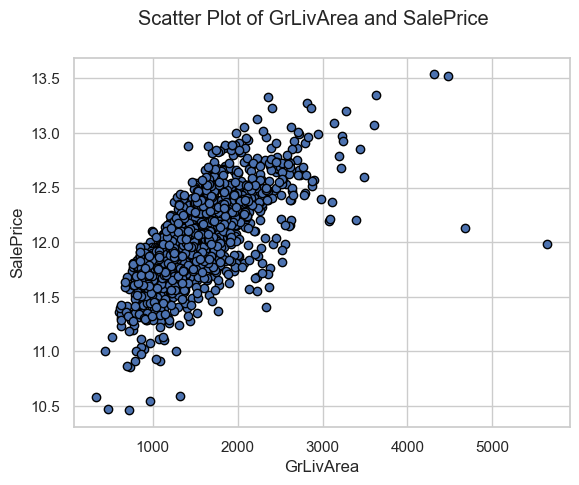

In [200]:
scatter_plot('GrLivArea')

In [201]:
# Checking the null % once again 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
FullBath,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
KitchenQual,0,0.000000
KitchenAbvGr,0,0.000000
BedroomAbvGr,0,0.000000
HalfBath,0,0.000000
BsmtHalfBath,0,0.000000


As per data dictionary provided null in some of the columns means absence of that particular thing. Hence it can have affect on the SalePrice.

We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [202]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429220,8


Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

In [203]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,WD,Normal,12.429220,8


In [204]:
data = data.drop(['MiscVal', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Functional' ], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,42,0,0,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,35,272,0,0,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,192,84,0,0,0,0,WD,Normal,12.429220,8


In [205]:
# We can also drop columns that show very low variance and thus not required for predictions
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [206]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [207]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     32
int64      26
float64     3
Name: 0, dtype: int64

In [208]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [209]:
# Columns with categorical data
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


Creating Dummy columns to convert categorical into numerical


In [210]:
data = pd.get_dummies(data, drop_first=True )
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [211]:
# dropping Saleprice from the dataframe

X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [212]:
# Putting response variable to y
y = data['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Data split and standardisation

In [213]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [214]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,-0.870387,0.612765,0.166080,-0.059996,1.252715,-0.575015,0.085426,-0.283127,0.347365,2.572160,...,0,0,0,0,1,0,0,0,1,0
1408,0.304785,-0.432534,-0.261043,-1.501313,1.252715,-0.575015,-0.943351,-0.283127,-0.973680,-1.069794,...,0,0,0,0,1,0,0,0,1,0
1148,-0.165284,-0.432534,-0.439778,0.660663,1.252715,-0.575015,-0.943351,-0.283127,-1.087563,-1.504156,...,0,0,0,0,1,0,0,0,1,0
861,3.125199,0.220778,0.079341,-0.780655,-1.406374,-0.575015,0.870488,-0.283127,-0.023894,-0.303879,...,0,0,0,0,1,0,0,0,1,0
220,-0.870387,0.133670,-0.151525,0.660663,-0.520011,-0.575015,-0.943351,-0.283127,1.021554,0.875837,...,0,0,1,0,0,0,0,0,0,1


In [215]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,-0.879672,0.106932,-0.211538,1.358461,-0.509551,-0.560080,-1.009468,-0.301886,0.899165,0.771223,...,0,0,0,0,1,0,0,0,1,0
530,0.559791,0.676372,0.029981,-0.099887,-0.509551,0.597117,0.743814,-0.301886,0.887692,0.884656,...,0,0,0,0,1,0,0,0,0,0
1291,2.479076,-2.360638,-1.583933,-0.829061,1.350309,0.856033,-0.518001,-0.301886,-1.019124,-1.434127,...,0,0,0,0,1,0,0,0,1,0
1385,-0.159940,-1.459026,-0.872447,-1.558235,2.280239,-0.560080,0.634091,-0.301886,-0.638220,-0.996222,...,0,0,0,0,1,0,0,0,1,0
305,-0.879672,0.439105,0.065215,1.358461,-0.509551,0.739785,2.300508,-0.301886,2.124484,2.179903,...,0,0,0,0,1,0,0,0,1,0


### Model Building

In [216]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will use the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [217]:
data.isnull().values.any()

False

In [218]:

# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, step = 100)            
rfe = rfe.fit(X_train, y_train)

In [219]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('PropAge', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low', F

In [220]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3',
       ...
       'GarageQual_none', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=103)

In [221]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Po', 'GarageQual_TA',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=104)

In [222]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [223]:
X_train_rfe = pd.DataFrame(X_train[col])

In [224]:
X_train_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,...,GarageQual_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
175,-0.059996,2.572160,-0.797551,-0.121406,1.229791,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1408,-1.501313,-1.069794,0.630928,-0.121406,-0.279140,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1148,0.660663,-1.504156,0.440311,-0.121406,-0.757443,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
861,-0.780655,-0.303879,-0.797551,-0.121406,-0.894101,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
220,0.660663,0.875837,-0.797551,-0.121406,-0.022906,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [225]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9273092661626882

In [226]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-2.352872046505309e+20

R2 Score is too low we need to check the other alternatives

In [227]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('PropAge', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low', F

In [228]:
# Select the top 100 variables

col1 = X_test.columns[rfe.support_]
col1

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3',
       ...
       'GarageQual_none', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=103)

In [229]:
X_test_rfe = X_test[col1]
X_test_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,...,GarageQual_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
930,1.358461,0.771223,-0.791130,-0.119344,-0.117457,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
530,-0.099887,0.884656,-0.791130,-0.119344,-0.035051,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1291,-0.829061,-1.434127,0.740428,-0.119344,-0.431748,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1385,-1.558235,-0.996222,0.024789,-0.119344,-0.715377,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
305,1.358461,2.179903,-0.791130,-0.119344,0.905907,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### RIDGE REGRESSION

In [230]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 207)
y_train (1021,)


In [231]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [234]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=3]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005443,0.001231,0.002991,0.001095,0.0001,{'alpha': 0.0001},-0.113044,-0.088362,-0.111543,-0.107148,...,-0.104803,0.008831,27,-0.070499,-0.075692,-0.071926,-0.062533,-0.071472,-0.070424,0.004322
1,0.005008,0.000604,0.001991,0.001091,0.001,{'alpha': 0.001},-0.113013,-0.088333,-0.111507,-0.107137,...,-0.104769,0.008831,26,-0.070499,-0.075695,-0.071927,-0.062534,-0.071476,-0.070426,0.004322
2,0.004780,0.000733,0.001594,0.000492,0.01,{'alpha': 0.01},-0.112708,-0.088056,-0.111160,-0.107036,...,-0.104450,0.008832,25,-0.070501,-0.075722,-0.071936,-0.062547,-0.071513,-0.070444,0.004327
3,0.005131,0.000292,0.001592,0.000490,0.05,{'alpha': 0.05},-0.111529,-0.087016,-0.109913,-0.106725,...,-0.103391,0.008839,24,-0.070531,-0.075886,-0.071976,-0.062607,-0.071678,-0.070536,0.004356
4,0.006379,0.002412,0.002009,0.000032,0.1,{'alpha': 0.1},-0.110319,-0.085973,-0.108941,-0.106446,...,-0.102449,0.008889,23,-0.070599,-0.076081,-0.072105,-0.062695,-0.071842,-0.070664,0.004389


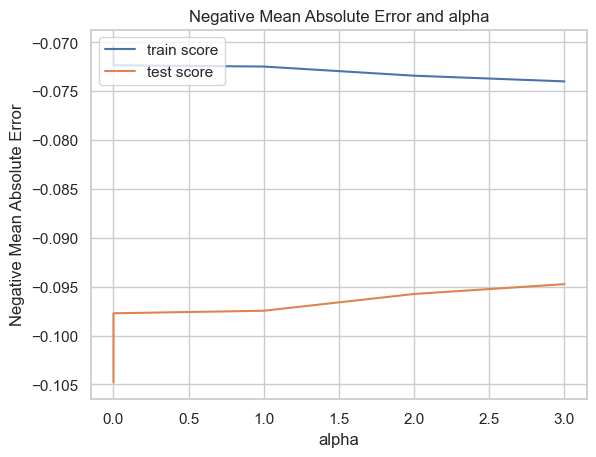

In [236]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [237]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [148]:
from sklearn.metrics import r2_score

In [149]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9114705407910835

In [150]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9109715462900774

In [151]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9159481254029996

In [152]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.919375608666013

In [153]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.921377000342247

In [154]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9245499739534798

In [155]:
alpha = 0.9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9247824617419587

In [156]:
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.925027787533496

In [157]:
alpha = 0.7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9252872766846267

In [158]:
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.925562221637168

In [159]:
alpha = 0.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9268114443870099

In [160]:
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9271193823209541

In [161]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9273083481545312

#### LASSO Regression

In [162]:
# Applying Lasso


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051819,0.000929,0.002201,0.000744,0.0001,{'alpha': 0.0001},-0.101389,-0.082087,-0.103738,-0.104318,...,-0.097633,0.008231,2,-0.072105,-0.078037,-0.073503,-0.064753,-0.072902,-0.072260,0.004283
1,0.013067,0.002106,0.001395,0.000488,0.001,{'alpha': 0.001},-0.091306,-0.084557,-0.097330,-0.103484,...,-0.092399,0.007211,1,-0.082161,-0.085265,-0.081154,-0.074057,-0.082346,-0.080997,0.003730
2,0.006313,0.000421,0.001795,0.000399,0.01,{'alpha': 0.01},-0.104529,-0.098994,-0.100960,-0.112343,...,-0.101695,0.006785,3,-0.099932,-0.102590,-0.098948,-0.088297,-0.101095,-0.098172,0.005085
3,0.004175,0.000292,0.001794,0.000399,0.05,{'alpha': 0.05},-0.137308,-0.122383,-0.132828,-0.139735,...,-0.129816,0.008804,4,-0.130587,-0.133071,-0.129419,-0.119567,-0.132747,-0.129078,0.004945
4,0.004187,0.000398,0.001395,0.000488,0.1,{'alpha': 0.1},-0.168374,-0.146599,-0.166323,-0.180801,...,-0.162134,0.012886,5,-0.162902,-0.163147,-0.160035,-0.157388,-0.164734,-0.161641,0.002611


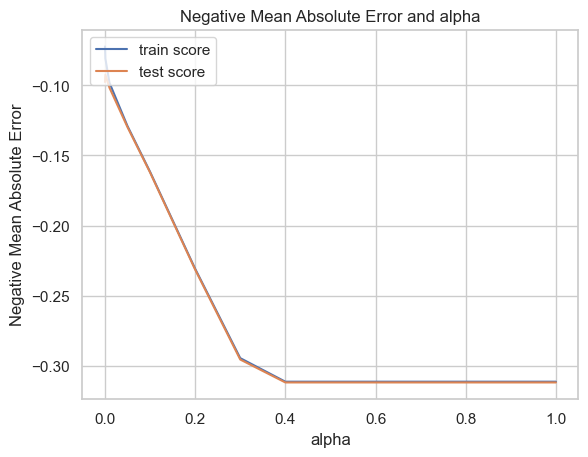

In [164]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [167]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.0184681 ,  0.        ,  0.01472643,  0.13153086,  0.04861805,
        0.        ,  0.00642856,  0.        ,  0.01708592,  0.00568986,
        0.        , -0.        ,  0.11748452,  0.02913439,  0.        ,
        0.02153861,  0.0018641 ,  0.        , -0.00573717,  0.02609706,
        0.04518928,  0.00852857,  0.        ,  0.        ,  0.        ,
        0.00787916, -0.01974315, -0.0898249 ,  0.        ,  0.        ,
        0.00991454, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [168]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3

In [169]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8611514145366681
0.8503345015827726


In [170]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [171]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.011
1,MSSubClass,-0.018
2,LotFrontage,0.000
3,LotArea,0.015
4,OverallQual,0.132


In [172]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
...,...,...
85,HouseStyle_2Story,-0.000
19,KitchenAbvGr,-0.006
1,MSSubClass,-0.018
27,PoolArea,-0.020


In [173]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.011
4,OverallQual,0.132
13,GrLivArea,0.117
5,OverallCond,0.049
21,GarageArea,0.045
14,BsmtFullBath,0.029
20,Fireplaces,0.026
16,FullBath,0.022
9,TotalBsmtSF,0.017
3,LotArea,0.015


In [174]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']


### Observation

The list of variables which are important in determing the SalePrice of house are as follows. This is obtained from the Lasso analysis done above

'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge'